In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from mplhep.plot import histplot
import numpy as np

In [73]:
def dEdx(z,m,P,Z=18,A=40,rho=1.78e-3,verbose=True): # default fuer Argon
    ne = rho/(A) * 6.022e23 * Z
    I = 16*Z**(0.9)
    D = 5.1e-19 #in MeV cm^2
    #print("ne",ne)
    #print("I",I)
    #print("D",D)

    E = np.sqrt(m**2 + P**2)
    beta = P/E
    gamma = E/m
    if(verbose):
        print("E = %.2f MeV"%(E*1e-6))
        print("beta",beta)
        print("gamma",gamma)
    bethe = D*z**2*ne/beta**2
    #print("bethe part1",bethe)
    bethe *= (np.log(2*511e3 * beta**2 * gamma**2/I) - beta**2)
    return bethe

In [74]:
particles = {
    'proton':{'mass':938.272e6,'z':1},
    'pion':{'mass':139.6e6,'z':1},
    'Kaon':{'mass':493.7e6,'z':1},
    'muon':{'mass':105e6,'z':-1}
}

In [83]:
def plot_particle(name,f=None,ax=None):
    p = np.linspace(0.1,100,10000)*1e9 #GeV
    def dEdx_(p):
        return dEdx(particles[name]['z'],particles[name]['mass'],p,verbose=False)
    dEdx_vec = np.vectorize(dEdx_)
    dEdx_arr = dEdx_vec(p)
    if(f is None or ax is None):
        f,ax = plt.subplots()
    ax.semilogx(p,dEdx_arr,label=name)
    ax.set_ylim(0,20000)
    return (f,ax)

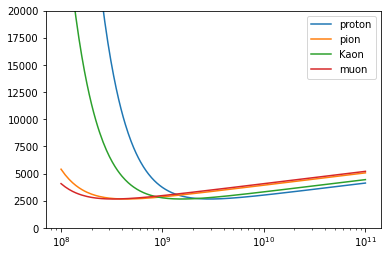

In [84]:
f,ax = plot_particle("proton")
for name in ['pion','Kaon','muon']:
    plot_particle(name,f,ax)
ax.legend()

In [4]:
#Aufgabe2a
for name,prop in particles.items():
    print('-'*10)
    print(name)
    print('-dEdx = %.4f keV/cm'%(dEdx(prop['z'],prop['mass'],800e6)*1e-3))

----------
proton
E = 1233.03 MeV
beta 0.6488100628642278
gamma 1.314146109542037
-dEdx = 4.5136 keV/cm
----------
pion
E = 812.09 MeV
beta 0.9851139873338348
gamma 5.817254753734365
-dEdx = 2.7845 keV/cm
----------
Kaon
E = 940.07 MeV
beta 0.8509965646151195
gamma 1.904140774265826
-dEdx = 2.9569 keV/cm
----------
muon
E = 806.86 MeV
beta 0.9914964278645998
gamma 7.684392404173228
-dEdx = 2.8882 keV/cm


In [5]:
#Aufgabe 2b
for name in ['pion','Kaon']:
    print('-'*10)
    print(name)
    print("-dEdx = %.4f MeV/cm"%(1e-6*dEdx(particles[name]['z'],particles[name]['mass'],0.8e9,14,28,2.329)))

----------
pion
E = 812.09 MeV
beta 0.9851139873338348
gamma 5.817254753734365
-dEdx = 4.1315 MeV/cm
----------
Kaon
E = 940.07 MeV
beta 0.8509965646151195
gamma 1.904140774265826
-dEdx = 4.4104 MeV/cm


In [6]:
me = 0.510998 #MeV
mmu = 105.65 #MeV
def E(x,E0,X0):
    ionisation = 2e6*3*X0*1e2
    return E0*(1+ionisation/E0)*np.exp(-x/X0) - ionisation

In [7]:
print('E(100m)\t = %.2f GeV'%(E(100,500e9,0.12*(mmu**2/me**2))*1e-9))
print('E(0)\t = %.2f GeV'%(E(0,500e9,0.12*(mmu**2/me**2))*1e-9))

E(100m)	 = 430.93 GeV
E(0)	 = 500.00 GeV


In [8]:
12e-2*(mmu**2/me**2)

5129.580481240443